In [1]:
import pandas as pd
import numpy as np
import seaborn as s
import matplotlib.pyplot as plt
import ROOT
import root_numpy
import glob



print 'ok'

Welcome to ROOTaaS 6.06/00
ok


In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
datapath = "/storage/gpfs_ams/ams/users/fdimicco/Deutons/InnerTrackerAnalysis/Risultati/2011_09"
def key(n):
    return int(n.split('_')[-1].split('.')[0])


datafiles = sorted(glob.glob(datapath + "/RisultatiDATI*"),key=key)



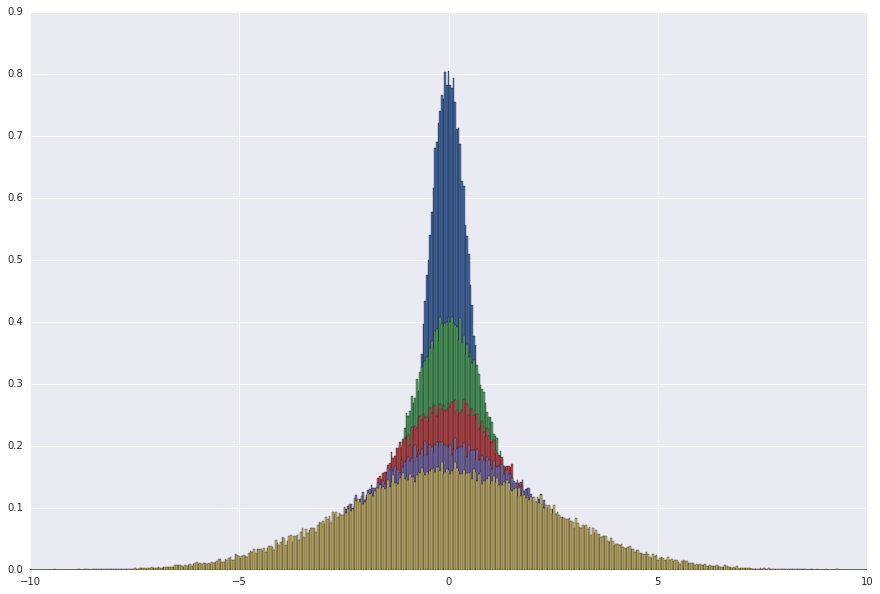

In [71]:


def convolve_steps(distrib,steps):
    l=[]
    increment_sigma=0
    for i in range(steps):
        increment_sigma += float(steps*0.1)
        c = np.random.normal(0,increment_sigma,100000) 
        l.append(c)    
    return l


distrib = np.random.normal(0,0.1,100000)

l = convolve_steps(distrib,5)

for item in l:
    plt.hist(item,bins=np.linspace(-10,10,500),normed=True)








In [ ]:
 
def mandelbrot( h,w, maxit=20 ):
    """Returns an image of the Mandelbrot fractal of size (h,w)."""
    y,x = np.ogrid[ -1.4:1.4:h*1j, -2:0.8:w*1j ]
    c = x+y*1j
    z = c
    divtime = maxit + np.zeros(z.shape, dtype=int)
    
    for i in range(maxit):
        z = z**2 + c
        diverge = z*np.conj(z) > 2**2            # who is diverging
        div_now = diverge & (divtime==maxit)  # who is diverging now
        divtime[div_now] = i                  # note when
        z[diverge] = 2                        # avoid diverging too much

    return divtime    

plt.imshow(mandelbrot(4000,4000))
plt.show()


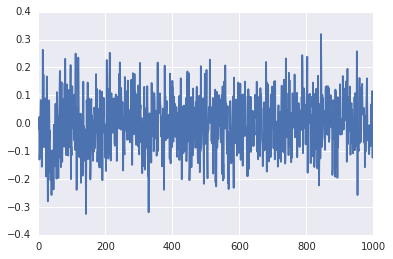

In [24]:
rootfile = ROOT.TFile(datafiles[0])
roottree = rootfile.Get("grandezzesepd")
array = root_numpy.tree2array(roottree)
df=pd.DataFrame(array[:1000])
plt.plot(a)

(0.4, 1.2)

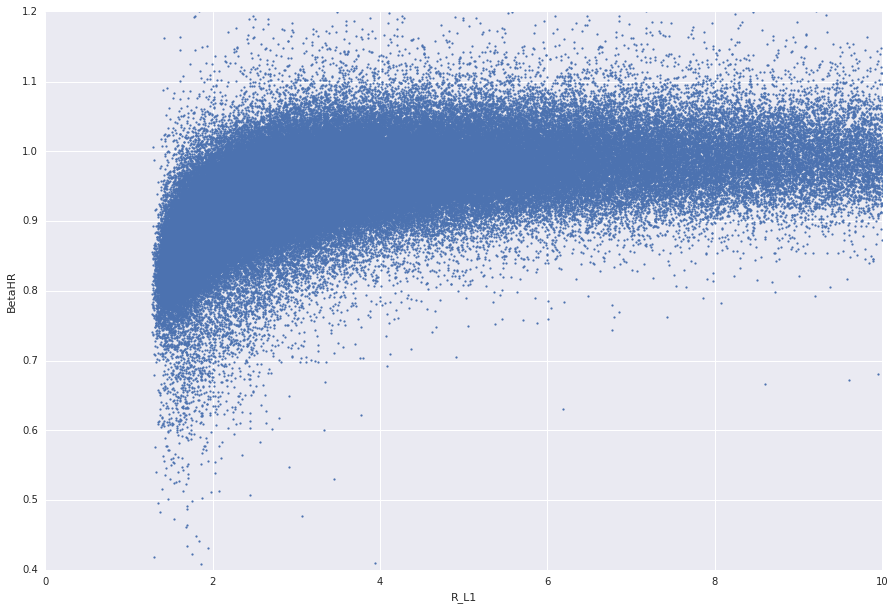

In [29]:
import pandas as pd
folder = "/storage/gpfs_ams/ams/users/kostya/DeuteronCleanCSV/"
frame = pd.DataFrame.from_csv(folder + "3_Feb_2013_00_3_Feb_2013_07.csv.gz")

figsize(15,10)
idx  = frame["Rcutoff40"] < 2
idx &= frame["R_L1"] > 1.2*frame["Rcutoff40"]
idx &= frame["Livetime"] > 0.7

frame[idx].plot.scatter(x="R_L1", y="BetaHR", lw=0, marker='.')
xlim(0,10)
ylim(0.4,1.2)